# Codecademy U.S. Medical Insurance Costs Data Analysis

In this project we analyse a dataset on US Medical Insurnace Costs provided by Codeacdemy. The goal of this data analysis project is to explore the dataset, and find out how certain factors may affect the insurance cost of a citizen residing in the United States of America. 

##### Step 1: Inspecting the data
The first thing we want to do is see what internal data we have, see if the dataset requires cleaning, and how it is organised. (Un-comment the print to see the file)


In [1]:
import csv
with open('insurance.csv') as insurance_file:
    #print(insurance_file.read())
    pass


It seems like there is no missing data, and data is delimited by commas. The fields of the data include age, sex, bmi, number of children, whether person is a smoker, region of residence, and insurance cost per annum. Lets create a huge dictionary that stores all this data. (Un-comment print line to view the data_dict)


In [2]:
data_dict = {}
with open('insurance.csv') as insurance_file:
    insurance_dict_reader = csv.DictReader(insurance_file)
    for id,row in enumerate(insurance_dict_reader):
        data_dict[id] = row
# print(data_dict)

##### Step 2: Explore the data
According to the University of Chicago's project scoping guide, data anlysis is an iterative process consisting of the cyclic steps of goal setting, guaging actions, acquiring data, and analysing the data. As we progress in a data analysis project our goals are refined and become more specific. Before we get down to biz, let us first explore the data we have, to get a better understanding of it.
0. How many records are there?
1. What is the average age of this sample group?
2. What is the majority sex?
3. What is the average bmi?
4. What is the average number of children?
5. Are most people smokers?
6. What is the proportion of residency in each region?
7. What is the average insurance cost?

In [3]:
print("There are a total of {} records.".format(len(data_dict)))

There are a total of 1338 records.


In [4]:
def get_average_age(data):
    total_age = 0.0
    for value in data.values():
        total_age += float(value['age'])
    return total_age / len(data)
print("The average age in this data set is {} years.".format(round(get_average_age(data_dict), 2)))

The average age in this data set is 39.21 years.


In [34]:
def get_majority_sex(data):
    num_of_male = 0
    num_of_fmale = 0
    for value in data.values():
        if value['sex'] == 'male':
            num_of_male += 1
        else:
            num_of_fmale += 1
    print("There are {} males, and {} females in this sample group".format(num_of_male, num_of_fmale))
    if num_of_male > num_of_fmale:
        return 'male'
    return 'female'
print("The majority sex in this data set is {}.".format(get_majority_sex(data_dict)))

There are 676 males, and 662 females in this sample group
The majority sex in this data set is male.


In [35]:
def get_average_bmi(data):
    total_bmi = 0.0
    for value in data.values():
        total_bmi += float(value['bmi'])
    return total_bmi / len(data)
print("The average BMI in this data set is {}.".format(round(get_average_bmi(data_dict), 2)))

The average BMI in this data set is 30.66.


In [36]:
def get_average_children(data):
    total_children = 0
    for value in data.values():
        total_children += int(value['children'])
    return total_children / len(data)
print("The average number of children in this data set is {}.".format(round(get_average_children(data_dict), 0)))

The average number of children in this data set is 1.0.


In [37]:
def get_majority_smoker(data):
    num_of_smoker = 0
    num_of_nsmoker = 0
    for value in data.values():
        if value['smoker'] == 'yes':
            num_of_smoker += 1
        else:
            num_of_nsmoker += 1
    print("There are {} smokers, and {} non-smokers in this sample group".format(num_of_smoker, num_of_nsmoker))
    if num_of_smoker > num_of_nsmoker:
        return 'are'
    return "aren't"
print("The majority of the people in this data set {} smokers.".format(get_majority_smoker(data_dict)))

There are 274 smokers, and 1064 non-smokers in this sample group
The majority of the people in this data set aren't smokers.


In [9]:
def get_region_proportion(data):
    regions = {}
    for value in data.values():
        region = value['region']
        if region not in regions:
            regions[region] = 1
        else:
            regions[region] += 1
    for key, value in regions.items():
        print("In {} there are {} residents in from this data set, which is {}% of the whole data set.".format(key, value, round((value/len(data_dict)*100), 2)))
get_region_proportion(data_dict)

In southwest there are 325 residents in from this data set, which is 24.29% of the whole data set.
In southeast there are 364 residents in from this data set, which is 27.2% of the whole data set.
In northwest there are 325 residents in from this data set, which is 24.29% of the whole data set.
In northeast there are 324 residents in from this data set, which is 24.22% of the whole data set.


In [10]:
def get_average_cost(data):
    total_cost = 0.0
    for value in data.values():
        total_cost += float(value['charges'])
    return total_cost / len(data)
print("The average medical insurance cost per person in the US is {} dollars.".format(round(get_average_cost(data_dict),2)))

The average medical insurance cost per person in the US is 13270.42 dollars.


Ok lets summarise a bit:
1. There are 1338 records in this data set, certainly a small percentage of the whole US population(328.2M)
2. Average age is 39.21 years
3. We have more males than females in this data set
4. Average BMI is 30.66 (The obese range!?)
5. On average, each person in this data set has one child
6. We have more non smokers than smokers in this data set
7. The spread in residency is quite even (~25% per region)
8. The average insurance cost is 13270.42 dollars per year

This is a pretty scary looking summary... Lets plot some graphs to visulise the spread of age, bmi, and try to identify some exceptionally high insurnace charges

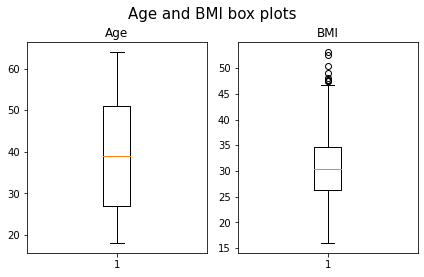

In [40]:
import matplotlib.pyplot as plt
age_lst = [float(value['age']) for value in data_dict.values()]
bmi_lst = [float(value['bmi']) for value in data_dict.values()]

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Age and BMI box plots', fontsize=15)

ax1.boxplot(age_lst)
ax1.set_title('Age')

ax2.boxplot(bmi_lst)
ax2.set_title('BMI')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

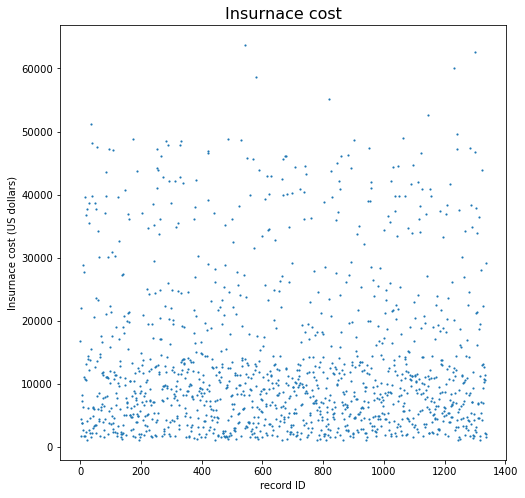

In [12]:
plt.close()
id_lst = [int(key) for key in data_dict.keys()]
cost_lst = [float(value['charges']) for value in data_dict.values()]
plt.figure(figsize=(8,8))
plt.scatter(x=id_lst, y=cost_lst, s=1.3)
plt.title('Insurnace cost', fontsize=16)
plt.xlabel('record ID')
plt.ylabel('Insurnace cost (US dollars)')
plt.show()

It seems like there are a few people with extremely high insurance costs, let's take a look at their details and gain some insight as to why

In [13]:
high_cost_records = []
for key, value in data_dict.items():
    if float(value['charges']) > 50000.0:
        high_cost_records.append([key, value])
for item in high_cost_records:
    item_id = item[0]
    item_d = item[1]
    print("ID:{id} has insurance cost of {cost} dollars\ndetails- age:{age}, BMI:{bmi}, sex:{sex}, smoker:{smoker}, number of children:{children}, region:{region}\n".format(id=item[0], age=item_d['age'], sex=item_d['sex'], bmi=item_d['bmi'], children=item_d['children'], region=item_d['region'], smoker=item_d['smoker'], cost=item_d['charges']))

ID:34 has insurance cost of 51194.55914 dollars
details- age:28, BMI:36.4, sex:male, smoker:yes, number of children:1, region:southwest

ID:543 has insurance cost of 63770.42801 dollars
details- age:54, BMI:47.41, sex:female, smoker:yes, number of children:0, region:southeast

ID:577 has insurance cost of 58571.07448 dollars
details- age:31, BMI:38.095, sex:female, smoker:yes, number of children:1, region:northeast

ID:819 has insurance cost of 55135.40209 dollars
details- age:33, BMI:35.53, sex:female, smoker:yes, number of children:0, region:northwest

ID:1146 has insurance cost of 52590.82939 dollars
details- age:60, BMI:32.8, sex:male, smoker:yes, number of children:0, region:southwest

ID:1230 has insurance cost of 60021.39897 dollars
details- age:52, BMI:34.485, sex:male, smoker:yes, number of children:3, region:northwest

ID:1300 has insurance cost of 62592.87309 dollars
details- age:45, BMI:30.36, sex:male, smoker:yes, number of children:0, region:southeast



Already we can see, there are two contributing factors to a high insurance cost, which are **BMI scores** and being a **smoker**

##### Step 3: Make simple linear models
Now that we've gained some insight into the data set, we want to create models so we can make predictions, to start off lets create linear models using linear regression ($y' = mx + b$). Each factor being an indepdent variable, and insurance cost being our variable. We will then test some hypotheses with those models. Finally, we will create a multi-variable model that predicts insurance cost based on all the factors.

<u>Age vs Cost</u><br>
Lets first look at how age fares against cost


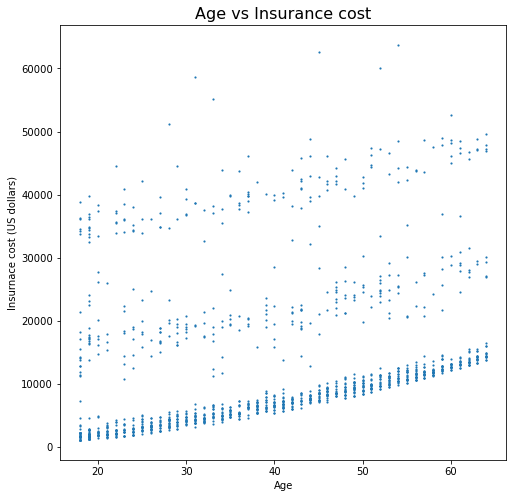

In [14]:
cost_lst = [float(value['charges']) for value in data_dict.values()]
age_lst = [float(value['age']) for value in data_dict.values()]
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(x=age_lst, y=cost_lst, s=1.3)
plt.title('Age vs Insurance cost', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Insurnace cost (US dollars)')
plt.show()

It seems like there is a positive correlation between age and insurance

b: 3165.885006063079
m: 257.72261866689394


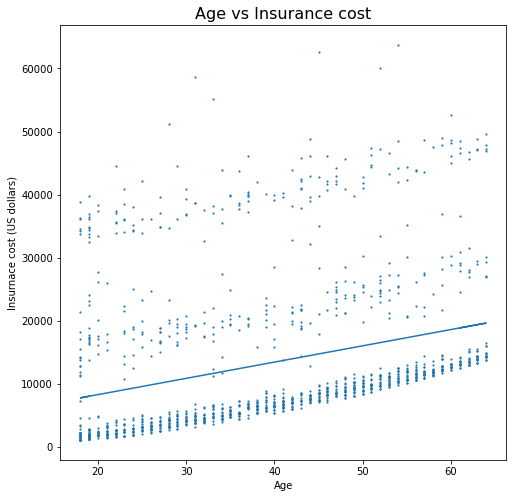

In [15]:
# Utility functions to calucalte slope and intercept of linear regression
def get_linear_regression(x:list, y:list):
    if len(x) == len(y):
        x_sum = sum(x)
        y_sum = sum(y)
        xy_sum = sum([x[i] * y[i] for i in range(len(x))])
        x_squared_sum = sum([(x[i] ** 2) for i in range(len(x))])
        y_squared_sum = sum([(y[i] ** 2) for i in range(len(y))])
        
        y_intercept = (y_sum * x_squared_sum - x_sum * xy_sum) / (len(x) * x_squared_sum - x_sum ** 2)
        slope = (len(x) * xy_sum - x_sum * y_sum) / (len(x) * x_squared_sum - x_sum ** 2)
        return y_intercept, slope

b, m = get_linear_regression(x=age_lst, y=cost_lst)

print("b: {}".format(b))
print("m: {}".format(m))

import numpy as np
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(x=age_lst, y=cost_lst, s=1.3)

x = np.array(age_lst)
plt.plot(x, b + m * x, '-')

plt.title('Age vs Insurance cost', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Insurnace cost (US dollars)')
plt.show()

So our model for age against cost is given by **y' = 257.72x + 3165.89** rounded to the 2 nearest significant figuires. Lets make some hypotheses and test it out against this model:

<i>H1: The higher the age, the higher the cost of insurnace</i><br>
<i>H2: The higher the age, the lower the cost of insurnace</i><br>

In [16]:
# Utility functions for getting y by x, and getting x by y
def get_y_by_x(m, b, x):
    return m * x + b

def get_x_by_y(m, b, y):
    return (y - b)/m

slope = 257.72261866689394
y_intercept = 3165.885006063079

test_age = [i for i in range(0, 100, 10)]
for age in test_age:
    print("At age {}, the model predicts your insurance cost to be {}.".format(age, get_y_by_x(slope, y_intercept, age)))

At age 0, the model predicts your insurance cost to be 3165.885006063079.
At age 10, the model predicts your insurance cost to be 5743.111192732018.
At age 20, the model predicts your insurance cost to be 8320.337379400959.
At age 30, the model predicts your insurance cost to be 10897.563566069897.
At age 40, the model predicts your insurance cost to be 13474.789752738838.
At age 50, the model predicts your insurance cost to be 16052.015939407776.
At age 60, the model predicts your insurance cost to be 18629.242126076715.
At age 70, the model predicts your insurance cost to be 21206.468312745656.
At age 80, the model predicts your insurance cost to be 23783.694499414596.
At age 90, the model predicts your insurance cost to be 26360.920686083533.


In [17]:
test_cost = [i for i in range(0, 60000, 6250)]
for cost in test_cost:
    print("If you pay {}, the model predicts your age to be {}.".format(cost, get_x_by_y(slope, y_intercept, cost)))


If you pay 0, the model predicts your age to be -12.284078993295424.
If you pay 6250, the model predicts your age to be 11.966799848185365.
If you pay 12500, the model predicts your age to be 36.21767868966615.
If you pay 18750, the model predicts your age to be 60.46855753114694.
If you pay 25000, the model predicts your age to be 84.71943637262773.
If you pay 31250, the model predicts your age to be 108.97031521410852.
If you pay 37500, the model predicts your age to be 133.2211940555893.
If you pay 43750, the model predicts your age to be 157.4720728970701.
If you pay 50000, the model predicts your age to be 181.72295173855088.
If you pay 56250, the model predicts your age to be 205.9738305800317.


Our model tells us that there is a directly proportional positive relationship between age and cost, which means the the older you are, the higher your medical insurance bills are. So <i>H1</i> is accepted, and <i>H2</i> is rejected.

<u>BMI vs Cost</u><br>
Now BMI against cost

b: 1192.9372089614828
m: 393.87303079738473


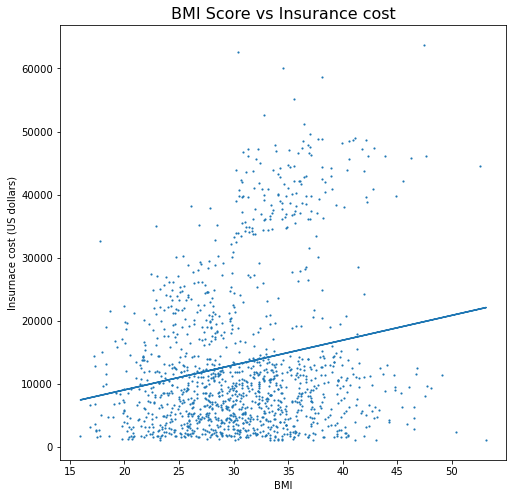

In [18]:
cost_lst = [float(value['charges']) for value in data_dict.values()]
bmi_lst = [float(value['bmi']) for value in data_dict.values()]

b, m = get_linear_regression(x=bmi_lst, y=cost_lst)

print("b: {}".format(b))
print("m: {}".format(m))

x = np.array(bmi_lst)
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(x=bmi_lst, y=cost_lst, s=1.3)
plt.plot(x, b + m * x, '-')
plt.title('BMI Score vs Insurance cost', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Insurnace cost (US dollars)')
plt.show()

Our BMI vs Cost model is **y' = 393.87x + 1192.94** rounded to the 2 nearest significant figuires. Again we hypothesize:

<i>H1: The higher the BMI Score, the higher the cost of insurnace</i><br>
<i>H2: The lower the BMI Score, the lower the cost of insurnace</i><br>

In [19]:
slope = 393.87303079738473
y_intercept = 1192.9372089614828
test_bmi = [i for i in range(0, 40, 4)]
for bmi in test_bmi:
    print("If your bmi score is closest to {}, your medical insurnace cost may be {}".format(bmi, get_y_by_x(slope, y_intercept, bmi)))

If your bmi score is closest to 0, your medical insurnace cost may be 1192.9372089614828
If your bmi score is closest to 4, your medical insurnace cost may be 2768.4293321510218
If your bmi score is closest to 8, your medical insurnace cost may be 4343.921455340561
If your bmi score is closest to 12, your medical insurnace cost may be 5919.4135785301
If your bmi score is closest to 16, your medical insurnace cost may be 7494.905701719638
If your bmi score is closest to 20, your medical insurnace cost may be 9070.397824909178
If your bmi score is closest to 24, your medical insurnace cost may be 10645.889948098717
If your bmi score is closest to 28, your medical insurnace cost may be 12221.382071288255
If your bmi score is closest to 32, your medical insurnace cost may be 13796.874194477794
If your bmi score is closest to 36, your medical insurnace cost may be 15372.366317667333


Although this model doesn't tell us much about what the actual medical insurance cost is for a certain BMI Score (it hasn't taken the other factors into account), it does show us that there is a directly proportional positive relationship bewteen BMI Score and medical cost. So the higher your BMI Score, the higher the insurance cost. <i>H1</i> is accepted, and <i>H2</i> is rejected

<u>Sex and Cost</u><br>
This time, let's see what the costs are based on sex demographic


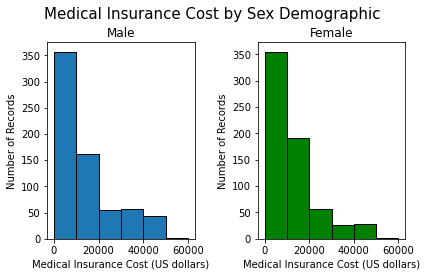

In [20]:
plt.close()
male_cost = []
female_cost = []

for key, value in data_dict.items():
    if value['sex'] == 'male':
        male_cost.append(float(value['charges']))
    elif value['sex'] == 'female':
        female_cost.append(float(value['charges']))
        

bins = [i for i in range(0, 60001, 10000)]

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Medical Insurance Cost by Sex Demographic', fontsize=15)

ax1.hist(male_cost, bins=bins, edgecolor='black')
ax1.set_title('Male')
ax1.set_xlabel('Medical Insurance Cost (US dollars)')
ax1.set_ylabel('Number of Records')

ax2.hist(female_cost, bins=bins, edgecolor='black', facecolor='g')
ax2.set_title('Female')
ax2.set_xlabel('Medical Insurance Cost (US dollars)')
ax2.set_ylabel('Number of Records')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Referring to our graphs, it seems like sex makes only a small difference to the cost of medical insurance. Lets see the average cost for a male and a female


In [21]:
avg_male_cost = sum(male_cost)/len(male_cost)
avg_female_cost = sum(female_cost)/len(female_cost)
print("The average medical insurance of a male costs {} dollars".format(avg_male_cost))
print("The average medical insurance of a female costs {} dollars".format(avg_female_cost))
print("The difference in medical insurance cost between the two sexes is {}".format(abs(avg_male_cost - avg_female_cost)))

The average medical insurance of a male costs 13956.751177721886 dollars
The average medical insurance of a female costs 12569.57884383534 dollars
The difference in medical insurance cost between the two sexes is 1387.1723338865468


Our model predicts that on average, being a male costs 1387.17 dollars more in medical insurance than being a female.

<u>Number of Children vs Cost</u><br>
What is the relationship between number of children and cost?


b: 12522.495549644096
m: 683.0893824813645


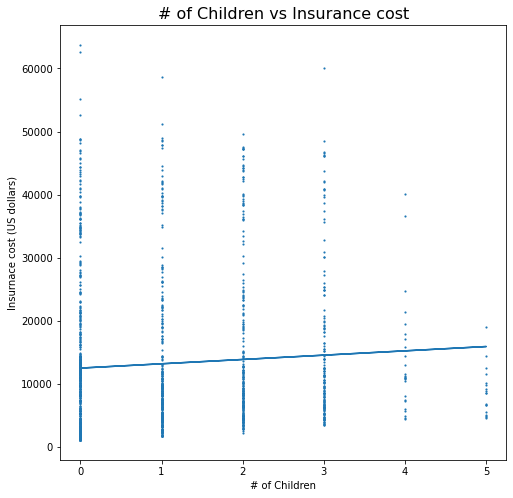

In [22]:
num_of_children_lst = [int(value['children']) for value in data_dict.values()]
b, m = get_linear_regression(x=num_of_children_lst, y=cost_lst)

print("b: {}".format(b))
print("m: {}".format(m))

x = np.array(num_of_children_lst)
plt.close()
plt.figure(figsize=(8,8))
plt.scatter(x=num_of_children_lst, y=cost_lst, s=1.3)
plt.plot(x, b + m * x, '-')
plt.title('# of Children vs Insurance cost', fontsize=16)
plt.xlabel('# of Children')
plt.ylabel('Insurnace cost (US dollars)')
plt.show()

This one in quite interesting. Our model for number of children vs medical insurance cos is **y' = 683.09x + 12522.50** rounded to the nearest two significant figures. Although we can infer a directly proportional positive relatinoship from this model, people with more children seem to have a lower insurnace cost, this model is at best inconclusive about the number of children vs medical insurance cost. Nevertheless, it may be note worthy that there are many more people with no children than those with 5, so the insurance cost of those with no children is more widely spread in the cost range. Still, we can try to make some hypotheses and see what our model predicts:

<i>H1: The higher the number of children, the higher the medical insurance cost</i><br>
<i>H2: The lower the number of children, the higher the medical insurance cost</i>

In [23]:
slope = m
y_intercept = b
test_children = [i for i in range(6)]
for test_num in test_children:
    print("If you have {} children/child, it's likely your medical insurance will cost {} dollars".format(test_num, get_y_by_x(slope, y_intercept, test_num)))

If you have 0 children/child, it's likely your medical insurance will cost 12522.495549644096 dollars
If you have 1 children/child, it's likely your medical insurance will cost 13205.58493212546 dollars
If you have 2 children/child, it's likely your medical insurance will cost 13888.674314606826 dollars
If you have 3 children/child, it's likely your medical insurance will cost 14571.76369708819 dollars
If you have 4 children/child, it's likely your medical insurance will cost 15254.853079569555 dollars
If you have 5 children/child, it's likely your medical insurance will cost 15937.94246205092 dollars


As we can see, <i>H1</i> is accepted, and <i>H2</i> is rejected.

<u>Smoker demographic vs Cost</u><br>
As we've seen before, being a smoker seems to be a major contributing factor to a high medical insurance cost, let's visualise this data better to get a better understanding.


0.20478325859491778


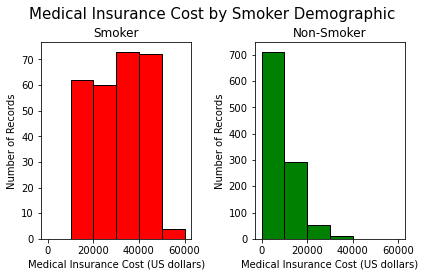

In [24]:
plt.close()
smoker_cost = []
non_smoker_cost = []
for key, value in data_dict.items():
    if value['smoker'] == 'yes':
        smoker_cost.append(float(value['charges']))
    elif value['smoker'] == 'no':
        non_smoker_cost.append(float(value['charges']))
        
print(len(smoker_cost)/len(data_dict))
bins = [i for i in range(0, 60001, 10000)]

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Medical Insurance Cost by Smoker Demographic', fontsize=15)

ax1.hist(smoker_cost, bins=bins, edgecolor='black', facecolor='r')
ax1.set_title('Smoker')
ax1.set_xlabel('Medical Insurance Cost (US dollars)')
ax1.set_ylabel('Number of Records')

ax2.hist(non_smoker_cost, bins=bins, edgecolor='black', facecolor='g')
ax2.set_title('Non-Smoker')
ax2.set_xlabel('Medical Insurance Cost (US dollars)')
ax2.set_ylabel('Number of Records')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Wow ok, albeit there are many more non-smokers (\~79.5%) than smokers(\~20.5%), smokers seem to be paying a hefty price for their unhealthy habits. Let's see on average how much each category pays, and what is the difference bewteen them.

In [25]:
avg_smoker_cost = sum(smoker_cost)/len(smoker_cost)
avg_nsmoker_cost = sum(non_smoker_cost)/len(non_smoker_cost)
print("The average medical insurance of a smoker costs {} dollars".format(avg_smoker_cost))
print("The average medical insurance of a non-smoker costs {} dollars".format(avg_nsmoker_cost))
print("The difference in medical insurance cost between a smoker and a non-smoker is {}".format(abs(avg_smoker_cost - avg_nsmoker_cost)))

The average medical insurance of a smoker costs 32050.23183153285 dollars
The average medical insurance of a non-smoker costs 8434.268297856199 dollars
The difference in medical insurance cost between a smoker and a non-smoker is 23615.96353367665


Our model predicts that on average, being a smoker costs 23615.96 dollars more in medical insurance than being a non-smoker!

<u> Region vs Cost </u><br>
Finally, let's see how residing in different parts of the US will affect insurance cost.

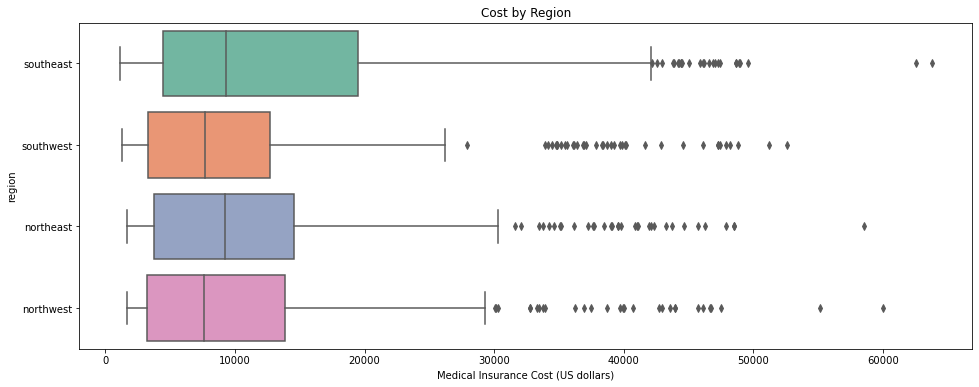

In [26]:
import seaborn as sns
import pandas as pd

region_dict = {'southeast':[], 'southwest':[], 'northeast':[], 'northwest':[]}
for values in data_dict.values():
    region_dict[values['region']].append(float(values['charges']))

max_len = 0
for key in region_dict.keys():
    if len(region_dict[key]) > max_len:
        max_len = len(region_dict[key])
        
for key in region_dict.keys():
    region_dict[key].sort()
    lst_len = len(region_dict[key])
    if lst_len < max_len:
        region_dict[key] += [min(region_dict[key])] * (max_len - lst_len)

df = pd.DataFrame(data=region_dict)
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df, orient="h", palette="Set2")
ax.set(ylabel='region', xlabel='Medical Insurance Cost (US dollars)', title='Cost by Region')
plt.show()

Remark: The four regions are more or less equally spread, with southeast region with approximately 2% more residents than the rest. Total sample size is 1338 records.<br>
From the graph above, we can infer several things:

1. Southeast and northeast region have a similar median close to 10000 dollars, but a different upper quartile range, which may imply that there is a wider spread of costs in the 50% to 75% percentile of the southeast region. Why that is is worthy of investigation<br>
2. The southwest, northeast, northwest regions have similar interquartile ranges, whereas in southeast has a larger interquartile range, which means more people residing in the southeast pays an amount within this range.<br>
3. Albeit more people in the southeast region pays within the 5000 to 20000 range, the maximum is also greater than the other regions<br>

With a relatively evenly distributed sample group in terms of regions, it seems that the southeast region has a wider spread in cost in general, reasons for that is worth investigating as well

##### Step 4: More models?!
Finally we're at a stage where we can generate a multiple regression mode. PSYCH! Before going into multiple regression, we have to make sure that there is no overfitting (including useless variables) and collinearity (the independent variables being dependent on each other, poor choice of words I know). To do that, we have to plot each independent variable with each of the other independent variables. Since we have 6 independent variables (age, sex, bmi, children number, smoker, and residence region), there are 30 more relationships we have to explore. Let's quickly do that below.

<u>Age</u>

Let's consider age... Do we really have to plot 5 additional graphs? Well luckily, age has nothing to do with region of residence and sex, so only BMI Score, number of children, and Smoker has any relation

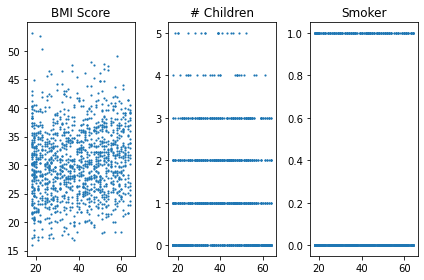

In [27]:
age_lst = []
bmi_lst = []
sex_lst = []
child_lst = []
smoker_lst = []
region_lst = []
cost_lst = []
for value in data_dict.values():
    age_lst.append(float(value['age']))
    bmi_lst.append(float(value['bmi']))
    cost_lst.append(float(value['charges']))
    if value['sex'] == 'male':
        sex_lst.append(1)
    else:
        sex_lst.append(0)
    child_lst.append(int(value['children']))
    if value['smoker'] == 'yes':
        smoker_lst.append(1)
    else:
        smoker_lst.append(0)
    region_lst.append(value['region'])
    
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(x=age_lst, y=bmi_lst, s=1.3)
ax1.set_title('BMI Score')

ax2.scatter(x=age_lst, y=child_lst, s=1.3)
ax2.set_title('# Children')

ax3.scatter(x=age_lst, y=smoker_lst, s=1.3)
ax3.set_title('Smoker')

plt.tight_layout()
plt.show()

Age is clear. There seems to be no linear relationship between age and any of these three variables

<u>Sex</u>

Let's now consider sex. Sex also has nothing to do with region of residence. Since we've already considered age, let's consider number of children, BMI score, and smoker.

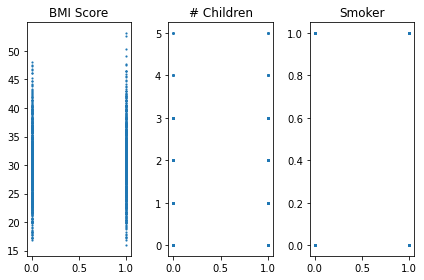

In [28]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(x=sex_lst, y=bmi_lst, s=1.3)
ax1.set_title('BMI Score')

ax2.scatter(x=sex_lst, y=child_lst, s=1.3)
ax2.set_title('# Children')

ax3.scatter(x=sex_lst, y=smoker_lst, s=1.3)
ax3.set_title('Smoker')

plt.tight_layout()
plt.show()

Ok... it seems like being a male and a female have a similar range of BMI scores, no relation to number of children, and smoker either.

<u>BMI Score</u>

Next up we have BMI Score. We've already inspected BMI vs sex and age, the only things it may have any relation to is number of children, smoker, and region of residence

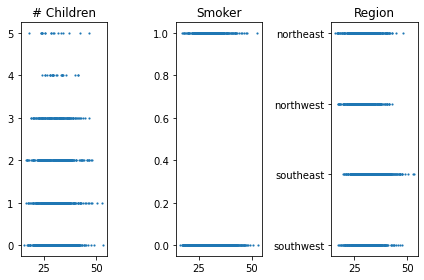

In [29]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(x=bmi_lst, y=child_lst, s=1.3)
ax1.set_title('# Children')

ax2.scatter(x=bmi_lst, y=smoker_lst, s=1.3)
ax2.set_title('Smoker')

ax3.scatter(x=bmi_lst, y=region_lst, s=1.3)
ax3.set_title('Region')

plt.tight_layout()
plt.show()

Still nothing!

<u> Number of Children </u>

For the number of children, the only meaningful relationships we haven't explored are smoker and region of residence

Let's see...

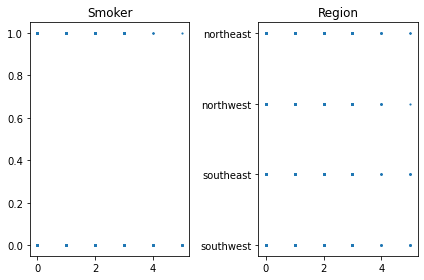

In [30]:
plt.close()
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter(x=child_lst, y=smoker_lst, s=1.3)
ax1.set_title('Smoker')

ax2.scatter(x=child_lst, y=region_lst, s=1.3)
ax2.set_title('Region')

plt.tight_layout()
plt.show()

We're almost there, most variables are still independent of each other, including this one!

<u>Smoker</u>

This is the last variable we have to explore, since region doesn't seem to want to have anything to do with the rest of the variables, let's see how region feels about smoker

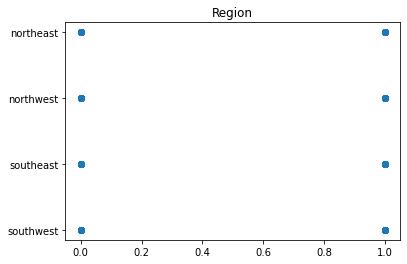

In [31]:
plt.close()

plt.scatter(x=smoker_lst, y=region_lst)
plt.title('Region')

plt.show()

As we've expected, region is a redundant variable! It has nothing to do with any of the other variables including cost so having it in our model would be overfitting. Also, we've made sure that there's no collinearity between the independet variables. We can finally move onto creating our multiple regression model.

##### Step 5: Our Multiple Regression Model
For this step, we want to be able to predict medical insurance cost with the following set of factors: age, sex, BMI Score, number of children, and smoker. Multiple regression is just an extension of linear regression, where it takes into account not one, but two or more independent variables. <br> This is how our estimated multiple linear regression looks like:<br>$ŷ = b_0 + b_1x_1 + b_2x_2 + ... + b_px_p $<br> where $ŷ$ is our estimated dependent variable value, $b_0$ is our y intercept, $b_1, ..., b_p$ our sequence of coefficients which tells us how many units $ŷ$ changes with 1 unit change of one of our independent variables, whilst all other independent variables stay fixed. $x_1, ... x_p$ is our sequence of variables, and $p$ is the number of variables, which in our case is 6. The error value is assumed to be 0. <br> There are different tools we can use to attain the coefficients and the y intercept, one of the ways is by using the sci kit learn library, which is what we're going to use.

In [32]:
from sklearn import linear_model as lm

data_dict_lst = {'age': age_lst, 'sex': sex_lst, 'bmi': bmi_lst, 'children': child_lst, 'smoker': smoker_lst, 'charges': cost_lst}


df = pd.DataFrame(data_dict_lst, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'charges'])
X = df[['age', 'sex', 'bmi', 'children', 'smoker']]
Y = df['charges']

reg = lm.LinearRegression()
reg.fit(X=X, y=Y)

print('b_0 :', reg.intercept_)
print('b_1...b_p:', reg.coef_)

b_0 : -12052.46198566474
b_1...b_p: [  257.73498767  -128.63985357   322.36421449   474.41112061
 23823.39253065]


There we have it! Our model is....<br> $est.cost = 257.73 * age - 128.64 * sex + 322.36 * bmi + children * 474.41 + 23823.39 * smoker - 12052.46$<br> where sex = 1 for male and 0 for female, and 1 for smoker and 0 for non-smoker

##### Step 6: Make Predictions

With our ultimate medical insurance model at hand, we can make predictions for different sets of data! Let's go ahead and do that!

In [33]:
class MedicalCostAnalyser():
    
    b = reg.intercept_
    coef = reg.coef_
    
    def __init__(self):
        pass
        
    def estimate_cost(self, data):
        for item in data:
            print(item, end='   ')
        print()
        cost = round(reg.predict([[data[0], data[1], data[2], data[3], data[4]]])[0], 2)
        print("Your estimated insurance cost is {} dollars\n".format(cost))
        
a = MedicalCostAnalyser()

# Create some fake people data
p1 = [18, 1, 25.6, 0, 0]
p2 = [65, 0, 28.3, 2, 1]
p3 = [34, 1, 30.3, 0, 1]
p4 = [25, 0, 18.7, 2, 0]
p5 = [45, 1, 22.5, 3, 0]

print("age sex  BMI #child smoker\n")
a.estimate_cost(p1)
a.estimate_cost(p2)
a.estimate_cost(p3)
a.estimate_cost(p4)
a.estimate_cost(p5)


age sex  BMI #child smoker

18   1   25.6   0   0   
Your estimated insurance cost is 710.65 dollars

65   0   28.3   2   1   
Your estimated insurance cost is 38595.43 dollars

34   1   30.3   0   1   
Your estimated insurance cost is 30172.92 dollars

25   0   18.7   2   0   
Your estimated insurance cost is 1367.95 dollars

45   1   22.5   3   0   
Your estimated insurance cost is 8093.4 dollars



##### Step 6: Conclusion
One of the most important things about data analysis is how we can use our model to inform our actions. I think this is where the true essence of data science lies, to use data to help us make better life choices, and make life better for everyone else in the world. So what does our model inform us?

1. Keep healthy and your BMI score in check to lower your medical insurance cost<br>
2. Don't smoke if you want a low medical insurance cost<br>
3. The place you live in has little to do with your insurance cost<br>
4. More children = more financial burden, doesn't make it any less worth it tho:)<br>
5. The older you become, the more you have to pay... not much we can do about that, but try to stay mentally young!<br>

Hope you enjoyed this as much as I did!